In [1]:
!pip install transformers --quiet

In [2]:
!pip install gradio --quiet

In [3]:
from transformers import pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

In [14]:
sentimental=pipeline("text-classification", model="Achar/NLP-Sentimental-Analysis-using-DistilBERT-ModeL")

config.json:   0%|          | 0.00/769 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/339 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


In [15]:
label_mapping={"LABEL_0":"Negative",
               "LABEL_1":"Positive"}
print(label_mapping)

{'LABEL_0': 'Negative', 'LABEL_1': 'Positive'}


In [6]:
result=sentimental("Hello i am going to Guntur to enjoy with my family")
result1=label_mapping[result[0]["label"]]
print(f'The sentiment is : {result1} and the score is : {result[0]["score"]}')

The sentiment is : Positive and the score is : 0.9493415355682373


In [16]:

new_data=[]
text=["Hello i am going to Guntur to enjoy with my family",
    "I am feeling very sad today.",
    "This project is amazing and I am very happy with it!",
    "The weather is terrible today, I hate it."]
for texts in text:
  result=sentimental(texts)
  sentiment=label_mapping[result[0]["label"]]
  score=result[0]["score"]
  new_data.append({"sentence":texts,
                   "sentiment":sentiment,
                   "score":score})
data=pd.DataFrame(new_data)

In [17]:
data.to_csv("Sentimental_results.csv", index=False)

In [18]:
data

,sentence,sentiment,score
0,Hello i am going to Guntur to enjoy with my fa...,Positive,0.971119
1,I am feeling very sad today.,Positive,0.975117
2,This project is amazing and I am very happy wi...,Positive,0.952203
3,"The weather is terrible today, I hate it.",Positive,0.975164


In [19]:
new_data1={"sentence":"Hello i am going to change my hostel because the hostel is not good ",
          "sentiment" : "Negative",
          "score":0.90}

In [26]:
data1=pd.DataFrame([new_data1])

In [27]:
data1

,sentence,sentiment,score
0,Hello i am going to change my hostel because t...,Negative,0.9


In [28]:
final_data=pd.concat([data,data1],ignore_index=True)

In [29]:
final_data

,sentence,sentiment,score
0,Hello i am going to Guntur to enjoy with my fa...,Positive,0.971119
1,I am feeling very sad today.,Positive,0.975117
2,This project is amazing and I am very happy wi...,Positive,0.952203
3,"The weather is terrible today, I hate it.",Positive,0.975164
4,Hello i am going to change my hostel because t...,Negative,0.900000


<ipython-input-34-14b6b4f9eba4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_data,x="sentiment",palette="Set2")


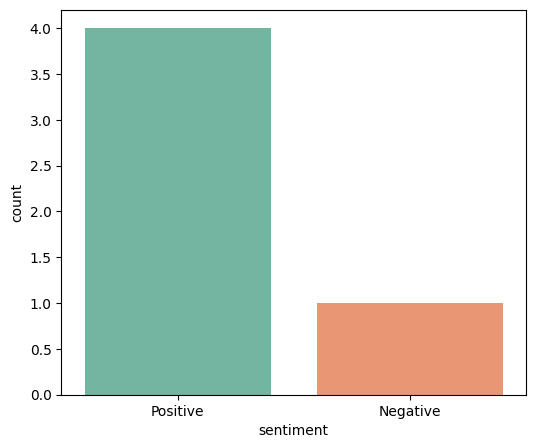

In [34]:
plt.figure(figsize=(6,5))
sns.countplot(data=final_data,x="sentiment",palette="Set2")
# Set the background color of the plot
plt.show()

In [40]:
human_read={"LABEL_0":"Negative",
            "LABEL_1":"Positive"}
sentimental=pipeline("text-classification", model="Dmyadav2001/Sentimental-Analysis")
def predictive_model(texts):
  result=sentimental(texts)
  sentiment=human_read[result[0]["label"]]
  score=result[0]["score"]
  return sentiment, score

interface=gr.Interface(fn=predictive_model,
                      inputs="text",
                      outputs=["text","number"],
                      title="Sentiment-Analysis-App",
                      description="Gave your text my machine is going to detect Positive / Negative "
                      )
interface.launch()

Device set to use cpu


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://59c191f05c09f8a8fe.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
